## Exploring Top2Vec on Recipe Topic Generation

Guide here: https://github.com/ddangelov/Top2Vec

#### Notes:
When running Top2Vec with Doc2Vec on the unmodified (only the initial quote and bracket removed from directions; both reformatted into a list of strings) directions and ingredients columns the topics returned were somewhat messy with words like recipe and ingredient sprinkled throughout.

BERT returned far fewer topics on both columns.

Using the "clean" and preprocessed columns, BERT only returned two topics for the ingredients list.

The clean and preprocessed directions column was found to contain nan for some (31 total out of 22k) recipes where the directions were short such as "Mix all the ingredients." and all words were removed during cleaning. There was one instance that numbers were the only characters present for both ingredients and directions. These were removed before running the topic generation model when the column of interest was impacted.

In [1]:
import pandas as pd
from top2vec import Top2Vec

In [2]:
df = pd.read_csv('Recipe_Recommendation/dataset/Recipe_sample_dataset_small_heroclean.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'title', 'ingredients', 'directions',
       'link', 'source', 'NER'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [5]:
df.head()

,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]",jar marshmallow creme pkg cream cheese philade...,bring cream cheese room temperature mix marshm...
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p...",russet yukon gold potato inch cube low fat m...,place potato large saucepan cover cold water s...
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd...",loaf bread dough brown sugar pkg regular van...,loaf bread small piece place piece greased x x...
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus...",cream half half large egg pepper salt pork...,preheat oven f spray muffin tin spray like pa...
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne...",lean ground beef small onion bean l bean t...,brown ground beef onion fat boil heat simmer ...


In [34]:
documents = [x for x in df['clean_directions'] if type(x)==str]

In [9]:
documents

['bring cream cheese room temperature mix marshmallow creme philadelphia cream cheese store refrigerator serve fresh sliced apple',
 'place potato large saucepan cover cold water starch cover fresh cold water boil medium heat boil minute potato tender warm milk butter wasabi paste small saucepan medium low heat butter whisk drain potato return beat low speed electric mixer electric mixer running beat milk mixture potato smooth light season salt green onion',
 'loaf bread small piece place piece greased x x inch dish brown sugar mix milk mix drizzle half brown sugar mix dough piece sprinkle half nut raisin dough small piece place first layer drizzle brown sugar mix nut raisin cover refrigerator overnight early next morning bake minute',
 'preheat oven f  spray muffin tin spray like pam mini bundt muffin pan spoon cooked sausage tin way mix egg cream addition optional cheese salsa bacon onion creative top sausage full minute egg golden sit couple minute spoon \\ muffin like\\ creation',


In [36]:
model = Top2Vec(documents, embedding_model='all-MiniLM-L6-v2',ngram_vocab=True)

2022-06-16 14:39:42,414 - top2vec - INFO - Pre-processing documents for training
2022-06-16 14:39:45,884 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
2022-06-16 14:39:53,123 - top2vec - INFO - Creating joint document/word embedding
2022-06-16 14:53:32,067 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2022-06-16 14:53:49,903 - top2vec - INFO - Finding dense areas of documents


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-06-16 14:53:52,059 - top2vec - INFO - Finding topics


In [37]:
model.get_num_topics()

95

In [38]:
model.get_topics()

(array([['prepared baking', 'baking', 'rimmed baking', ..., 'pastry bag',
         'casserole dish', 'melted butter'],
        ['five spice', 'chili', 'chili powder', ..., 'bbq sauce',
         'souffle dish', 'peppercorn'],
        ['salad dressing', 'blender food', 'mayonnaise mustard', ...,
         'vegetable peeler', 'mustard worcestershire', 'streusel topping'],
        ...,
        ['rinse quinoa', 'quinoa', 'crock pot', ..., 'barbecue sauce',
         'green chilli', 'picante sauce'],
        ['turkey brine', 'roasting pan', 'poultry seasoning', ...,
         'preheated oven', 'baking dish', 'cooked'],
        ['brisket', 'prepare barbecue', 'barbecue sauce', ...,
         'crock pot', 'chef knife', 'spice']], dtype='<U22'),
 array([[0.6451203 , 0.6249644 , 0.583102  , ..., 0.44790027, 0.44775003,
         0.4446131 ],
        [0.5397018 , 0.5359385 , 0.52430415, ..., 0.45076212, 0.44996238,
         0.4498235 ],
        [0.6423501 , 0.5917181 , 0.56918216, ..., 0.4506693 , 0.4

In [39]:
model.get_topic_sizes()

(array([2064, 1392, 1032,  929,  896,  645,  600,  560,  504,  469,  451,
         418,  402,  354,  336,  312,  310,  304,  304,  303,  298,  280,
         275,  270,  265,  260,  248,  234,  228,  224,  216,  213,  210,
         197,  191,  180,  179,  176,  173,  171,  169,  168,  166,  165,
         160,  159,  157,  156,  146,  145,  140,  137,  136,  133,  130,
         130,  121,  121,  113,  107,  105,  100,   93,   90,   89,   88,
          83,   83,   81,   81,   77,   75,   75,   74,   73,   73,   72,
          71,   70,   68,   65,   64,   63,   61,   58,   53,   51,   50,
          47,   46,   44,   43,   32,   27,   23]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 

In [32]:
model.document_vectors

array([[-0.03058413, -0.01699625,  0.05523836, ..., -0.00249344,
        -0.02321933,  0.00898253],
       [-0.04902707,  0.02464362, -0.06151605, ..., -0.05133207,
         0.01278309, -0.09880567],
       [-0.03838213, -0.02761241, -0.01739532, ...,  0.0788573 ,
         0.04426862,  0.04590827],
       ...,
       [-0.08269433,  0.10524148, -0.0396578 , ...,  0.00838121,
         0.06616524,  0.01164344],
       [-0.03090633, -0.01018223,  0.02951281, ..., -0.06793416,
         0.04059885, -0.02640156],
       [ 0.03898106,  0.06661298,  0.13710797, ...,  0.06665467,
         0.05884932,  0.01509591]], dtype=float32)

In [40]:
vectors = model.document_vectors

In [41]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=2, 
                            metric='cosine').fit_transform(model.document_vectors)

In [42]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

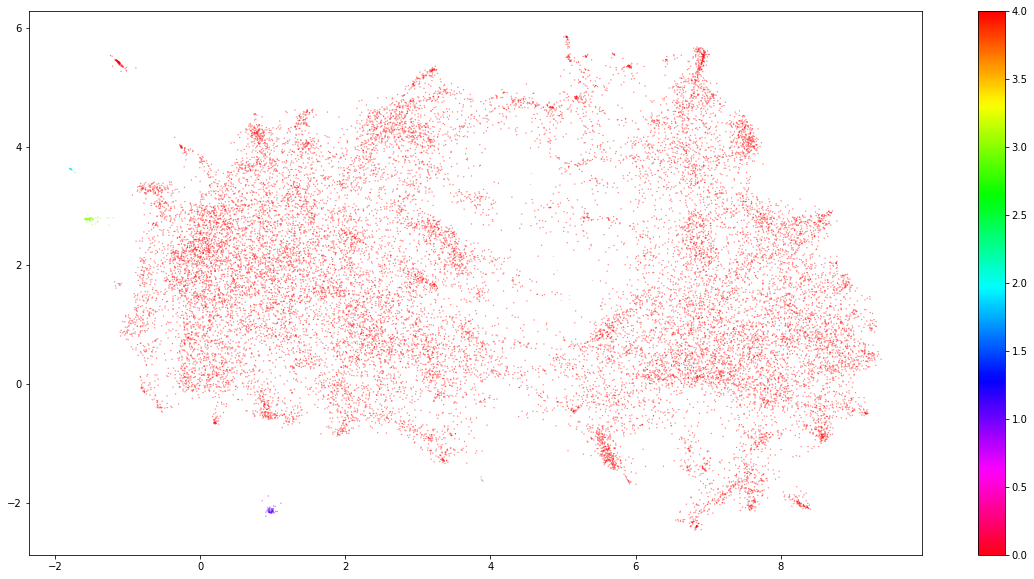

In [43]:
import matplotlib.pyplot as plt

# Prepare data
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [44]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [45]:
model.topic_words_reduced

array([['prepared baking', 'baking', 'rimmed baking', 'baking dish',
        'baked', 'lined baking', 'baked pastry', 'baking sheet',
        'baked crust', 'baked pie', 'bake preheated', 'dough',
        'buttered casserole', 'pastry blender', 'bake',
        'miniature muffin', 'cookie sheet', 'ceramic baking',
        'baking tray', 'mini muffin', 'creamed mixture', 'bread machine',
        'waffle maker', 'lined muffin', 'mixing bowl', 'melt butter',
        'cream maker', 'pancake', 'cornbread', 'stick cooking',
        'floured board', 'standard muffin', 'blender food',
        'melted butter', 'crusty bread', 'dough sticky',
        'greased cookie', 'oven', 'casserole dish', 'floured bundt',
        'french bread', 'dough hook', 'greased floured', 'flour',
        'pastry', 'bake uncovered', 'dessert plate', 'pastry bag',
        'dessert', 'pan'],
       ['blender food', 'minced garlic', 'flavored cooking',
        'five spice', 'chili', 'stick cooking', 'caramelized onion',
 